In [1]:
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline
from skimage import transform,io
import glob

In [2]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
# output_nodes = 10
# summer 12 + winter 12 + other 1
output_nodes = 25

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [4]:
train_dataset = []
for image_file_name in glob.glob('./DATA/TRAIN_mini/*/*'):
    print(image_file_name)
    line = str(image_file_name[13:])
    line = line[:line.find('/')]
    #print(line)
    if line  == "FRONTNANAMEFIT": label = 0
    elif line  == "FRONTTATEFAR": label = 1
    elif line  == "FRONTTATEFITBOTTOM": label = 2
    elif line  == "FRONTTATEFITCENTER": label = 3
    elif line  == "FRONTTATEFITLEFT": label = 4
    elif line  == "FRONTTATEFITRIGHT": label = 5
    elif line  == "FRONTTATEFITTOP": label = 6
    elif line  == "FRONTTATEJUSTCENTER": label = 7
    elif line  == "FRONTTATENEAR": label = 8
    elif line  == "FRONTYOKOFAR": label = 9
    elif line  == "FRONTYOKOFIT": label = 10
    elif line  == "NANAMETATEFIT": label = 11
    elif line  == "WINTERFRONTNANAMEFIT": label = 12
    elif line  == "WINTERFRONTTATEFAR": label = 13
    elif line  == "WINTERFRONTTATEFITBOTTOM": label = 14
    elif line  == "WINTERFRONTTATEFITCENTER": label = 15
    elif line  == "WINTERFRONTTATEFITLEFT": label = 16
    elif line  == "WINTERFRONTTATEFITRIGHT": label = 17
    elif line  == "WINTERFRONTTATEFITTOP": label = 18
    elif line  == "WINTERFRONTTATEJUSTCENTER": label = 19
    elif line  == "WINTERFRONTTATENEAR": label = 20
    elif line  == "WINTERFRONTYOKOFAR": label = 21
    elif line  == "WINTERFRONTYOKOFIT": label = 22
    elif line  == "WINTERNANAMETATEFIT": label = 23
    else: label = 24
    #print(label)
    img = transform.resize(io.imread(image_file_name, as_gray=True), (28, 28), mode='symmetric', preserve_range=True)
    # matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    img_data = img.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # print(numpy.min(img_data))
    # print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    train_dataset.append(record)
    pass

./DATA/TRAIN_mini/02838_Human_leg_resized/17064023044_57951e7e59_z.jpg.jpg
./DATA/TRAIN_mini/02838_Human_leg_resized/14652853751_596e01e105_z.jpg.jpg
./DATA/TRAIN_mini/02838_Human_leg_resized/15076410302_7b7040fe75_z.jpg.jpg
./DATA/TRAIN_mini/02838_Human_leg_resized/19256341990_faeab156ec_z.jpg.jpg
./DATA/TRAIN_mini/00486_Bicycle_wheel_resized/18749638040_2e880ce22d_z.jpg.jpg
./DATA/TRAIN_mini/00486_Bicycle_wheel_resized/15023903473_ce5308340c_z.jpg.jpg
./DATA/TRAIN_mini/00486_Bicycle_wheel_resized/16129702312_4456fc3c45_z.jpg.jpg
./DATA/TRAIN_mini/00486_Bicycle_wheel_resized/8460562526_b927c7f31a_z.jpg.jpg
./DATA/TRAIN_mini/FRONTTATEFITCENTER/62a2e78a7dd45a99b9c89de9c7252ca5eee83d98_224_70.jpg
./DATA/TRAIN_mini/FRONTTATEFITCENTER/c6aaf42849f3acb19d7b0108103f993cb3816901_224_70.jpg
./DATA/TRAIN_mini/FRONTTATEFITCENTER/dba2530590eeec7899e2578368c82b12900de43f_224_70.jpg
./DATA/TRAIN_mini/FRONTTATEFITCENTER/d2eeae615e3f1a8366bd6dc32cee2f750520bf39_224_70.jpg
./DATA/TRAIN_mini/NANAMETATEF

./DATA/TRAIN_mini/WINTERFRONTTATEFITBOTTOM/daf0ba1ab1b692f19daa89ab2354acd7f48d0e74_224_70.jpg
./DATA/TRAIN_mini/00195_Human_beard_resized/15099153928_c71116e052_z.jpg.jpg
./DATA/TRAIN_mini/00195_Human_beard_resized/9076682412_efec0950ed_z.jpg.jpg
./DATA/TRAIN_mini/00195_Human_beard_resized/2664405308_278495d21a_z.jpg?zz=1.jpg
./DATA/TRAIN_mini/00195_Human_beard_resized/16704030884_3b8fa3fb39_z.jpg.jpg
./DATA/TRAIN_mini/00318_Sunglasses_resized/4999809860_7b91a3d6b7_z.jpg.jpg
./DATA/TRAIN_mini/00318_Sunglasses_resized/7760774992_aaf00d2735_z.jpg.jpg
./DATA/TRAIN_mini/00318_Sunglasses_resized/19819747433_7d420ed1dd_z.jpg.jpg
./DATA/TRAIN_mini/00318_Sunglasses_resized/5879470138_f6235e1ddb_z.jpg.jpg
./DATA/TRAIN_mini/WINTERFRONTTATEFITLEFT/36568d6ec8ae9eb84378249093506744a03abcb7_R180_R2L_RESIZED.jpg
./DATA/TRAIN_mini/WINTERFRONTTATEFITLEFT/a6af12d78759b48b61c46bf84650329036855899_R90_TLC_RESIZED.jpg
./DATA/TRAIN_mini/WINTERFRONTTATEFITLEFT/b149ab63a8fa7015d96913e15264c1b191e42393_TLC_RE

In [5]:
# train the neural network
epochs = 10
for e in range(epochs):
    for record in train_dataset:
        inputs = numpy.asfarray(record[1:])
        # print(inputs)
        targets = numpy.zeros(output_nodes) + 0.01
        targets[int(record[0])] = 0.99
        # print(targets)
        n.train(inputs, targets)
        pass
    pass

In [6]:
# create test dataset
test_dataset = []
for image_file_name in glob.glob('./DATA/TEST_mini/*/*'):
    # print(image_file_name)
    line = str(image_file_name[17:])
    line = line[:line.find('/')]
    # print(line)
    if line  == "FRONTNANAMEFIT": label = 0
    elif line  == "FRONTTATEFAR": label = 1
    elif line  == "FRONTTATEFITBOTTOM": label = 2
    elif line  == "FRONTTATEFITCENTER": label = 3
    elif line  == "FRONTTATEFITLEFT": label = 4
    elif line  == "FRONTTATEFITRIGHT": label = 5
    elif line  == "FRONTTATEFITTOP": label = 6
    elif line  == "FRONTTATEJUSTCENTER": label = 7
    elif line  == "FRONTTATENEAR": label = 8
    elif line  == "FRONTYOKOFAR": label = 9
    elif line  == "FRONTYOKOFIT": label = 10
    elif line  == "NANAMETATEFIT": label = 11
    elif line  == "WINTERFRONTNANAMEFIT": label = 12
    elif line  == "WINTERFRONTTATEFAR": label = 13
    elif line  == "WINTERFRONTTATEFITBOTTOM": label = 14
    elif line  == "WINTERFRONTTATEFITCENTER": label = 15
    elif line  == "WINTERFRONTTATEFITLEFT": label = 16
    elif line  == "WINTERFRONTTATEFITRIGHT": label = 17
    elif line  == "WINTERFRONTTATEFITTOP": label = 18
    elif line  == "WINTERFRONTTATEJUSTCENTER": label = 19
    elif line  == "WINTERFRONTTATENEAR": label = 20
    elif line  == "WINTERFRONTYOKOFAR": label = 21
    elif line  == "WINTERFRONTYOKOFIT": label = 22
    elif line  == "WINTERNANAMETATEFIT": label = 23
    else: label = 24
    # print(label)
    img = transform.resize(io.imread(image_file_name, as_gray=True), (28, 28), mode='symmetric', preserve_range=True)
    # matplotlib.pyplot.imshow(img, cmap='Greys', interpolation='None')
    img_data = img.reshape(784)
    img_data = (img_data / 255.0 * 0.99) + 0.01
    # print(numpy.min(img_data))
    # print(numpy.max(img_data))
    record = numpy.append(label,img_data)
    # print(record)
    test_dataset.append(record)
    print(str(len(test_dataset) - 1) + ", " + str(label) +", " + image_file_name) 
    pass

0, 24, ./DATA/TEST_mini/02838_Human_leg_resized/9398240723_e7a663b2a7_z.jpg.jpg
1, 24, ./DATA/TEST_mini/00486_Bicycle_wheel_resized/15297068702_d17fc2cb2e_z.jpg.jpg
2, 3, ./DATA/TEST_mini/FRONTTATEFITCENTER/bed0944491a8c177de720b0f704f3e8ef793e09b_224_70.jpg
3, 11, ./DATA/TEST_mini/NANAMETATEFIT/a681c5c9f30b8e26be1e969197d946d22bb335d5_224_70.jpg
4, 13, ./DATA/TEST_mini/WINTERFRONTTATEFAR/9e17de620cefc76c96a7b9ced76b45815daf9203.jpg
5, 24, ./DATA/TEST_mini/00479_Boy_resized/156039810_b2d4143515_o.jpg.jpg
6, 22, ./DATA/TEST_mini/WINTERFRONTYOKOFIT/eb84c58b3775b56b2a702c964c929a4a291024b1_R180_B2T_RESIZED_R90.jpg
7, 24, ./DATA/TEST_mini/01318_Desk_resized/2552258919_8e7a4a866a_z.jpg.jpg
8, 20, ./DATA/TEST_mini/WINTERFRONTTATENEAR/f99ba707a1e7005f2a519a75c5e84f0f1e9c01d8_TRIMMED_WINTER_JCC60_RESIZED.jpg
9, 24, ./DATA/TEST_mini/02648_Fruit_resized/19879103843_dc9775df76_z.jpg.jpg
10, 24, ./DATA/TEST_mini/06052_Human_arm_resized/15193350585_1a90948d95_z.jpg.jpg
11, 8, ./DATA/TEST_mini/FRONT

21.0
[[0.01159088]
 [0.0115842 ]
 [0.01159557]
 [0.01158632]
 [0.01158336]
 [0.01158288]
 [0.01158265]
 [0.01159242]
 [0.01158576]
 [0.01157691]
 [0.01158934]
 [0.01158718]
 [0.011596  ]
 [0.01157395]
 [0.01159518]
 [0.01158182]
 [0.01158394]
 [0.01158644]
 [0.01159338]
 [0.0115807 ]
 [0.01159248]
 [0.01159412]
 [0.01158263]
 [0.01158798]
 [0.98841896]]
network says  24
no match!


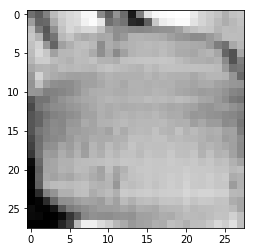

In [7]:
# test the neural network with our own images
item = 49
matplotlib.pyplot.imshow(test_dataset[item][1:].reshape(28,28), cmap='Greys', interpolation='None')
correct_label = test_dataset[item][0]
print(correct_label)
inputs = test_dataset[item][1:]
outputs = n.query(inputs)
print (outputs)
label = numpy.argmax(outputs)
print("network says ", label)
if (label == correct_label):
    print ("match!")
else:
    print ("no match!")
    pass

In [8]:
# test the neural network
scorecard = []
for record in test_dataset:
    # print(record)
    correct_label = int(record[0])
    inputs = test_dataset[item][1:]
    outputs = n.query(inputs)
    label = numpy.argmax(outputs)
    if (label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.5384615384615384
